<a href="https://colab.research.google.com/github/zoribecca/Data_Science_Practice_Projects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
estonia_df = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Datasets/estonia-passenger-list.csv")

In [5]:
estonia_df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [6]:
estonia_df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [7]:
# Descriptive analysis
estonia_df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


# **Variable Description**


*   PassengerID: Unique id of each passenger
*   Country: Country each passenger came from
*   Firstname: Passsengers first name
*   Lastname: Passengers lastname
*   Sex: Gender of passengers
*   Age: Age of passengers
*   Category: P = Passenger, C = Carriage
*   Survived: 0 = Died 1 = Survived










In [8]:
estonia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB




*   Object(5): Country, Firstname, Lastname, Sex, Category
*   Int64(3): PassengerID, Age, Survived



## **Univariate Variable Analysis**


*   Categorical Variable: Sex, Firstname, Lastname, Country, Category
*   Numerical Variable: PassengerID, Age, Survived



## **Categorical Variable**

In [9]:
def bar_plot(variable):
  """
  input: variable ex: "Sex"
  output: barplot & value count
  """
  # get feature
  var = estonia_df[variable]
  # Count number of categorical variable (value/sample)
  varValue = var.value_counts()

  # Visualize
  plt.figure(figsize = (9,3))
  plt.bar(varValue.index, varValue)
  plt.xticks (rotation = 45)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()
  print("{}: \n {}".format(variable, varValue))

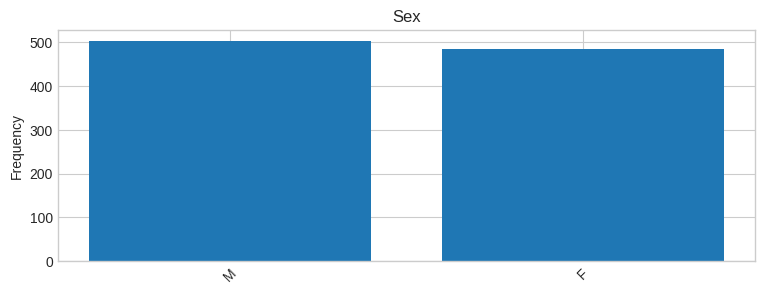

Sex: 
 Sex
M    503
F    486
Name: count, dtype: int64


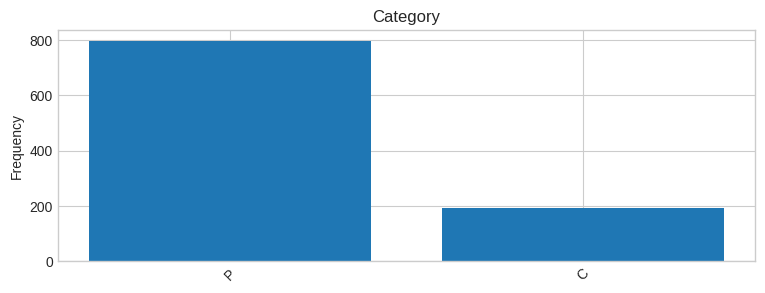

Category: 
 Category
P    796
C    193
Name: count, dtype: int64


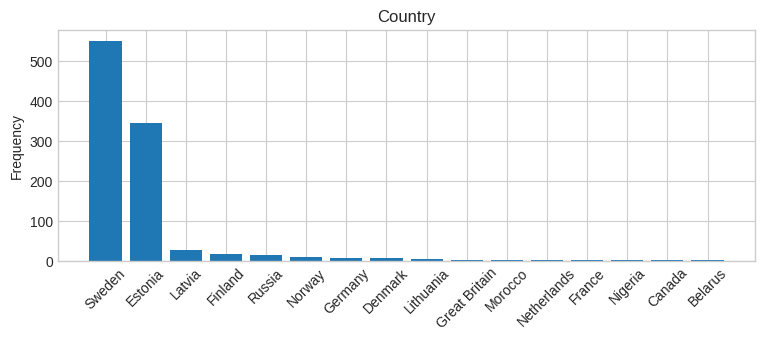

Country: 
 Country
Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Great Britain      2
Morocco            2
Netherlands        2
France             1
Nigeria            1
Canada             1
Belarus            1
Name: count, dtype: int64


In [10]:
category1 = ["Sex", "Category", "Country"]
for c in category1:
  bar_plot(c)

In [11]:
category2 = ["Firstname", "Lastname"]
for c in category2:
  print("{} \n".format(estonia_df[c].value_counts()))

Firstname
ANDRES                   8
RAIVO                    8
TIINA                    8
PEETER                   6
KATRIN                   6
                        ..
ING-MARI KRISTINA ELI    1
INGA LILLY VIOLA         1
INGEGERD LINNEA          1
MAJA KRISTINA            1
CARL                     1
Name: count, Length: 849, dtype: int64 

Lastname
ANDERSSON    15
NILSSON      12
ERIKSSON     11
JOHANSSON     9
KARLSSON      9
             ..
KIMMEL        1
KIPPA         1
KIPPAR        1
KIRI          1
OVBERG        1
Name: count, Length: 774, dtype: int64 



## **Numerical Variable**

In [12]:
def plot__hist(variable):
  plt.figure(figsize = (9,3))
  plt.hist(estonia_df[variable], bins = 20)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title("{} Distribution".format(variable))
  plt.show()

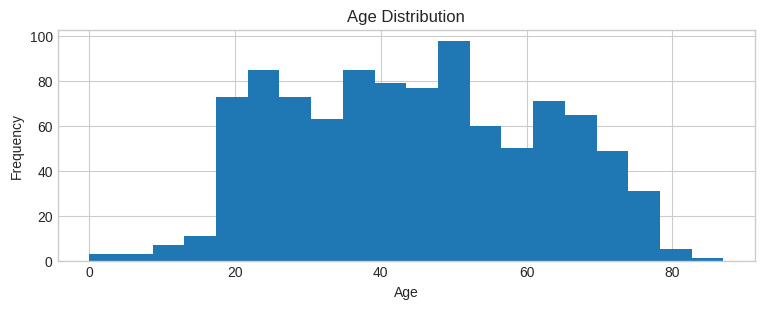

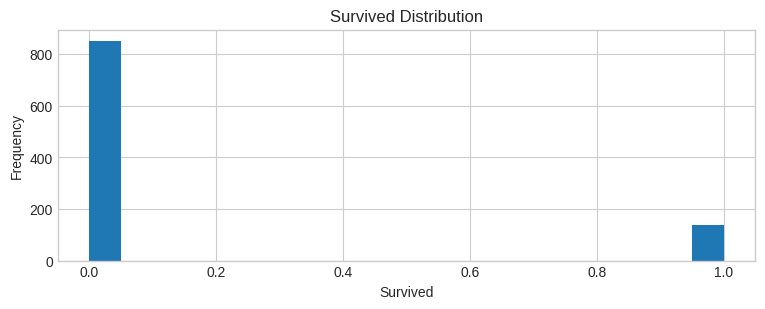

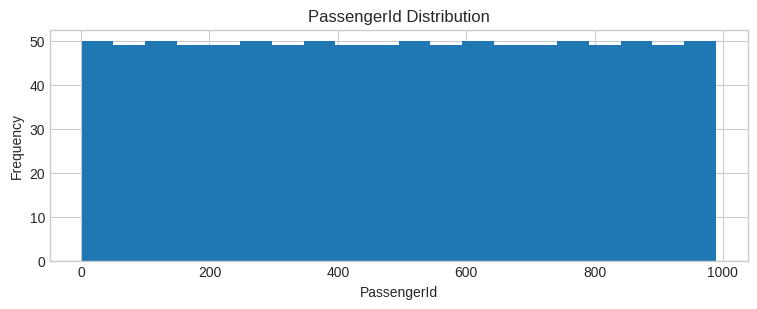

In [13]:
numericVar = ["Age", "Survived", "PassengerId"]
for n in numericVar:
  plot__hist(n)

## **Basic Data Analysis**


*   Age - Survived
*   Sex - Survived
*   Category - Survived
*   Country - Survived





In [14]:
# Age - Survived
estonia_df[["Age", "Survived"]].groupby(["Age"], as_index = False) .mean().sort_values(by = "Survived", ascending = False)

,Age,Survived
7,12,1.000000
10,15,1.000000
18,23,0.421053
21,26,0.384615
38,43,0.380952
...,...,...
50,55,0.000000
51,56,0.000000
52,57,0.000000
53,58,0.000000


In [15]:
# Sex vs Survived
estonia_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False) .mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
1,M,0.218688
0,F,0.055556


In [16]:
# Category vs Survived
estonia_df[["Category", "Survived"]].groupby(["Category"], as_index = False) .mean().sort_values(by = "Survived", ascending = False)

,Category,Survived
0,C,0.202073
1,P,0.123116


In [17]:
# Country vs Survived
estonia_df[["Country", "Survived"]].groupby(["Country"], as_index = False) .mean().sort_values(by = "Survived", ascending = False)

,Country,Survived
7,Great Britain,0.500000
11,Netherlands,0.500000
4,Finland,0.375000
6,Germany,0.375000
13,Norway,0.333333
9,Lithuania,0.250000
8,Latvia,0.214286
3,Estonia,0.186047
2,Denmark,0.166667
14,Russia,0.142857


## **Outlier Detection**

In [18]:
def detect_outliers(df, features):
  outlier_indices = []

  for c in features:
    # 1st quartile
    Q1 = np.percentile(df[c], 25)
    # 3rd quartile
    Q3 = np.percentile(df[c],75)
    # IQR
    IQR = Q3 - Q1
    # Outlier step
    outlier_step = IQR * 1.5
    # Detect outlier and their indices
    outlier_list_col = df[(df[c] , Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].as_index
    # Store indices
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

  return multiple_outliers